In [1]:
# 행렬 분해를 이용한 잠재 요인 협업 필터링
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import numba as nb

In [2]:
# 학습 데이터를 읽어온다.
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\book-recommendation\\'
books = pd.read_csv(DATA_PATH + 'Books.csv')
ratings = pd.read_csv(DATA_PATH + 'Ratings.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
print(books.shape)
print(books.info())

(271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
print(ratings.shape)
print(ratings.info())

(1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


In [21]:
df =books.merge(ratings, how="left", on="ISBN")

In [22]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [23]:
df.shape

(1032345, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1032345 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   Image-URL-S          1032345 non-null  object 
 6   Image-URL-M          1032345 non-null  object 
 7   Image-URL-L          1032341 non-null  object 
 8   User-ID              1031136 non-null  float64
 9   Book-Rating          1031136 non-null  float64
dtypes: float64(2), object(8)
memory usage: 86.6+ MB


In [25]:
df.dropna(inplace=True)

In [26]:
#Converting User-ID and Age variable types to int
df['User-ID'] = df['User-ID'].astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1032344
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031129 non-null  object 
 1   Book-Title           1031129 non-null  object 
 2   Book-Author          1031129 non-null  object 
 3   Year-Of-Publication  1031129 non-null  object 
 4   Publisher            1031129 non-null  object 
 5   Image-URL-S          1031129 non-null  object 
 6   Image-URL-M          1031129 non-null  object 
 7   Image-URL-L          1031129 non-null  object 
 8   User-ID              1031129 non-null  int32  
 9   Book-Rating          1031129 non-null  float64
dtypes: float64(1), int32(1), object(8)
memory usage: 82.6+ MB


In [29]:
#Removing books with zero ratings from the data set
df[df["Book-Rating"]==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,85526,0.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,96054,0.0
...,...,...,...,...,...,...,...,...
1032336,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,275970,0.0
1032338,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,276077,0.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,276680,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,276680,0.0


In [30]:
#Removing books with zero ratings from the data set
df=df[df["Book-Rating"]>0]
df["Book-Rating"].describe()

count    383838.000000
mean          7.626694
std           1.841346
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [31]:
#Unique reader count
df["User-ID"].nunique()

68091

In [32]:
#Unique number of books
df["Book-Title"].nunique()

135564

In [33]:
#We found how many books users read
df.groupby('User-ID')['Book-Title'].agg('count').sort_values()

User-ID
138845       1
141631       1
141640       1
141641       1
141645       1
          ... 
23902     1180
153662    1845
189835    1899
98391     5689
11676     6943
Name: Book-Title, Length: 68091, dtype: int64

In [34]:
#How many times have we read which book?
book_counts = pd.DataFrame(df["Book-Title"].value_counts())

In [35]:
#Most read books
book_counts.sort_values("Book-Title", ascending=False)

,Book-Title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
...,...
"Die Kraft Der Liebe (Fiction, Poetry and Drama)",1
Whose Life Is It Anyway?,1
And Then She Was Gone,1
Today's Been a Helluva Week,1


In [36]:
#We named the books with less than 100 reads as rare books.
rare_book = book_counts[book_counts["Book-Title"] <= 100].index#Number of rarely read books

In [37]:
#Number of rarely read books
rare_book.nunique()

135372

In [38]:
#By removing the rare books from the dataset, we found the widely read books
common_book = df[~df["Book-Title"].isin(rare_book)]
common_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9.0
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,29526,9.0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,46398,9.0
36,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,49635,9.0
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,67958,10.0


In [39]:
#User-Book matrix
user_book_df = common_book.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
user_book_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
user_id_ls = user_book_df.index

In [46]:
book_title_ls = user_book_df.columns

In [48]:
UR = np.array(common_book.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating"))

In [49]:
# number of users and items
N_ROW = UR.shape[0]
N_COL = UR.shape[1]
N_ROW, N_COL

(16397, 192)

In [50]:
@nb.jit
# SGD로 행렬 F, B를 업데이트한다.
def update_matrix(R, F, B, a, r):
    for i in range(N_ROW):
        for j in range(N_COL):
            if np.isnan(R[i, j]) != True:  # nan이 아니면
                # error 항을 계산한다.
                eij = R[i, j] - np.dot(F[i, :], B[j, :])
    
                # update F, B
                F[i, :] += a * (eij * B[j, :] - r * F[i, :])
                B[j, :] += a * (eij * F[i, :] - r * B[j, :])

@nb.jit
# NaN이 포함된 행렬의 mean_squared_error를 계산한다.
# 행렬 x에는 NaN이 포함돼 있다. y에는 없다.
def mse_skip_nan(x, y):
    mse = 0.0
    cnt = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if np.isnan(x[i, j]) != True:  # nan이 아니면
                mse += (x[i, j] - y[i, j]) ** 2
                cnt += 1
    return mse / cnt

# SGD로 행렬을 F, B로 분해한다.
def factorize_matrix(matR, k, max_iter=1000, alpha=0.01, beta=0.01, err_limit=1e-4):
    # F, B를 random 초기화한다.
    F = np.random.rand(N_ROW, k)  # factor matrix
    B = np.random.rand(N_COL, k)  # beta matrix.
 
    old_err = 9999   # error 초깃값
    err_hist = []    # error history
    for step in range(max_iter):
        # F, B를 업데이트한다.
        update_matrix(matR, F, B, alpha, beta)
        
        # error를 계산하고 저장해 둔다.
        err = mse_skip_nan(matR, np.dot(F, B.T))
        err_hist.append(err)

        # early stopping
        if np.abs(old_err - err) < err_limit:
            break
        
        old_err = err
        
        if step % 10 == 0:
            print('{} : error={:.4f}'.format(step, err))

    if step >= max_iter - 1:
        print('max_iter={}번 동안 stop하지 못했습니다.'.format(max_iter))
        print('max_iter를 늘리거나 err_limit을 늘려야 합니다.')
        
    return F, B.T, err_hist

In [53]:
K = 10  # number of factors
F, B, err = factorize_matrix(UR, k=K, max_iter=100)

# 타겟 유저가 보지 않은 영화들에 대해 해당 유저가 부여할 rating을 추정한다.
target_user_idx = 9  
top_n = 10                    # 추정 평정이 높은 상위 top_n개

# target user가 안 본 영화의 인덱스와 추정 rating
ER = np.dot(F, B)   # estimated R
unseen_idx = np.where(np.isnan(UR[target_user_idx, :]))[0]
pred_R = ER[user_id, unseen_idx]

unseen_idx

0 : error=4.1864
10 : error=0.6988
20 : error=0.3291
30 : error=0.1992
40 : error=0.1486
50 : error=0.1230
60 : error=0.1074
70 : error=0.0967
80 : error=0.0888
90 : error=0.0826
max_iter=100번 동안 stop하지 못했습니다.
max_iter를 늘리거나 err_limit을 늘려야 합니다.


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [75]:
from PIL import Image
# target user에게 추천할 영화 리스트
recom_idx = np.array(pred_R).argsort()[::-1][:top_n]

print('\책 추천 목록 : User = {}'.format(user_id_ls[target_user_idx]))
print("--- {:s} {:s}".format('-' * 35, '-' * 15))
print("No  {:35s} {:s}".format('Title', 'Expected rating'))
print("--- {:s} {:s}".format('-' * 35, '-' * 15))
for i, p in enumerate(recom_idx):
    title = book_title_ls[unseen_idx[p]]
    img_url = df[df['Book-Title']== title]['Image-URL-L'].values[0]
    print("{:2d} : {:40s}{:.4f}".format(i+1, title[:39], pred_R[p]))
    print(img_url)   
print("{:s}".format('-' * 55))

\책 추천 목록 : User = 226
--- ----------------------------------- ---------------
No  Title                               Expected rating
--- ----------------------------------- ---------------
 1 : The Giver (21st Century Reference)      9.2438
http://images.amazon.com/images/P/0440219078.01.LZZZZZZZ.jpg
 2 : The Golden Compass (His Dark Materials, 9.0076
http://images.amazon.com/images/P/037582345X.01.LZZZZZZZ.jpg
 3 : 1984                                    8.9813
http://images.amazon.com/images/P/0451524934.01.LZZZZZZZ.jpg
 4 : Fahrenheit 451                          8.9668
http://images.amazon.com/images/P/3257208626.01.LZZZZZZZ.jpg
 5 : The Green Mile                          8.9005
http://images.amazon.com/images/P/0671032658.01.LZZZZZZZ.jpg
 6 : The Return of the King (The Lord of the 8.8328
http://images.amazon.com/images/P/0345339738.01.LZZZZZZZ.jpg
 7 : Ender's Game (Ender Wiggins Saga (Paper 8.8135
http://images.amazon.com/images/P/0312853238.01.LZZZZZZZ.jpg
 8 : The Tao of Poo

In [69]:
df[df['Book-Title']== '1984']['Image-URL-L'].values[0]                       

'http://images.amazon.com/images/P/0451524934.01.LZZZZZZZ.jpg'

user 수 = 6277
book 개수 = 7015
user number = 242 ~ 278851
book number = 000649840X ~ 9727722458
user 수 = 6277
movie 개수 = 7015
user number = 0 ~ 6276
movie number = 0 ~ 7014
0 : error=0.6543
10 : error=0.0658
20 : error=0.0363
30 : error=0.0262
40 : error=0.0212
50 : error=0.0183
60 : error=0.0163
70 : error=0.0150


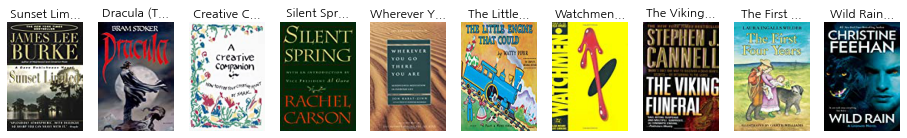


01.  Sunset Limited (Dave Robicheaux Mysteries (Paperback))
02.  Dracula (Tor Classics)
03.  Creative Companion: How to Free Your Creative Spirit
04.  Silent Spring
05.  Wherever You Go, There You Are : Mindfulness Meditation in Everyday Life
06.  The Little Engine That Could
07.  Watchmen
08.  The Viking Funeral (A Shane Scully Novel)
09.  The First Four Years (Little House)
10.  Wild Rain


In [76]:

# 데이터가 많아서 pivot_table()에서 메모리 에러가 발생한다.
# 일단 rating = 0을 제외하자.
# rating = 0은 무엇을 의미하는가? NaN 하고는 무엇이 다른가?
# 향후 deep learning에서는 pivoting을 하지 않으므로 'no problem'
ratings = ratings[ratings['Book-Rating'] > 0]

# 책을 한,두 권만 읽은 user들도 많다. 
# 10권 이하로 읽은 user들은 추천 대상에서 제외해 보자.
value_counts = ratings['User-ID'].value_counts()
to_remove = value_counts[value_counts <= 10].index
ratings = ratings[~ratings['User-ID'].isin(to_remove)]

# 책도 5명 이하가 본 책은 제외하자. 대중적이지 않은 책일 것임.
value_counts = ratings['ISBN'].value_counts()
to_remove = value_counts[value_counts <= 5].index
ratings = ratings[~ratings['ISBN'].isin(to_remove)]

ratings.shape

ratings.head()

print('user 수 =', len(set(ratings['User-ID'])))
print('book 개수 =', len(set(ratings['ISBN'])))
print('user number = {} ~ {}'.format(ratings['User-ID'].min(), ratings['User-ID'].max()))
print('book number = {} ~ {}'.format(ratings['ISBN'].min(), ratings['ISBN'].max()))

# rating의 scale 조정. 1 ~ 10 ==> 0.1 ~ 1.0
max_rating = ratings['Book-Rating'].max()
ratings['Book-Rating'] /= max_rating

# User-ID와 ISBN에 순차적인 id를 다시 부여한다.
user_enc = LabelEncoder()
item_enc = LabelEncoder()

ratings['User-ID'] = user_enc.fit_transform(ratings['User-ID'])
ratings['ISBN'] = item_enc.fit_transform(ratings['ISBN'])
ratings.head()

print('user 수 =', len(set(ratings['User-ID'])))
print('movie 개수 =', len(set(ratings['ISBN'])))
print('user number = {} ~ {}'.format(ratings['User-ID'].min(), ratings['User-ID'].max()))
print('movie number = {} ~ {}'.format(ratings['ISBN'].min(), ratings['ISBN'].max()))

# pivoting
UR = np.array(ratings.pivot_table('Book-Rating', index='User-ID', columns='ISBN'))

# number of users and items
N_ROW = UR.shape[0]
N_COL = UR.shape[1]
N_ROW, N_COL

#@title 행렬분해코드
@nb.jit
# SGD로 행렬 F, B를 업데이트한다.
def update_matrix(R, F, B, a, r):
    for i in range(N_ROW):
        for j in range(N_COL):
            if np.isnan(R[i, j]) != True:  # nan이 아니면
                # error 항을 계산한다.
                eij = R[i, j] - np.dot(F[i, :], B[j, :])
    
                # update F, B
                F[i, :] += a * (eij * B[j, :] - r * F[i, :])
                B[j, :] += a * (eij * F[i, :] - r * B[j, :])

@nb.jit
# NaN이 포함된 행렬의 mean_squared_error를 계산한다.
# 행렬 x에는 NaN이 포함돼 있다. y에는 없다.
def mse_skip_nan(x, y):
    mse = 0.0
    cnt = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if np.isnan(x[i, j]) != True:  # nan이 아니면
                mse += (x[i, j] - y[i, j]) ** 2
                cnt += 1
    return mse / cnt

# SGD로 행렬을 F, B로 분해한다.
def factorize_matrix(matR, k, max_iter=1000, alpha=0.01, beta=0.01, err_limit=1e-4):
    # F, B를 random 초기화한다.
    F = np.random.rand(N_ROW, k)  # factor matrix
    B = np.random.rand(N_COL, k)  # beta matrix.
 
    old_err = 9999   # error 초깃값
    err_hist = []    # error history
    for step in range(max_iter):
        # F, B를 업데이트한다.
        update_matrix(matR, F, B, alpha, beta)
        
        # error를 계산하고 저장해 둔다.
        err = mse_skip_nan(matR, np.dot(F, B.T))
        err_hist.append(err)

        # early stopping
        if np.abs(old_err - err) < err_limit:
            break
        
        old_err = err
        
        if step % 10 == 0:
            print('{} : error={:.4f}'.format(step, err))

    if step >= max_iter - 1:
        print('max_iter={}번 동안 stop하지 못했습니다.'.format(max_iter))
        print('max_iter를 늘리거나 err_limit을 늘려야 합니다.')
        
    return F, B.T, err_hist

K = 10  # number of factors
F, B, err = factorize_matrix(UR, k=K, max_iter=100)
# 1분 17초 정도 걸렸음.

# 타겟 유저가 보지 않은 영화들에 대해 해당 유저가 부여할 rating을 추정한다.
user_id = 0   # target user
top_n = 10    # 추정 평점이 높은 상위 top_n개

# target user가 안 본 영화의 인덱스와 추정 rating
ER = np.dot(F, B)   # estimated R
unseen_idx = np.where(np.isnan(UR[user_id, :]))[0]
pred_R = ER[user_id, unseen_idx]

# target user에게 추천할 영화 리스트
# recom_idx = label encoding된 수치 배열임.
recom_idx = np.array(pred_R).argsort()[::-1][:top_n]

# recom_idx를 원래의 ISBN으로 환원한다.
recom_isbn = item_enc.inverse_transform(recom_idx)

# 추천 책들의 제목 대신 이미지를 표시한다.
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image

# 추천 대상 책의 이미지 url과 title (제목)을 뽑는다.
book_img_url = []
book_title = []
for x in recom_isbn:
    url = books[books['ISBN'] == x]['Image-URL-M'].values
    if len(url) > 0:  # 이미지 URL이 없는 경우는 제외했음.
        book_img_url.append(url[0])
        book_title.append(books[books['ISBN'] == x]['Book-Title'].values[0])

# 이미지를 표시한다.
fig, ax = plt.subplots(1, len(book_img_url),figsize=(16,2))

for i, (url, title) in enumerate(zip(book_img_url, book_title)):
    img = Image.open(urlopen(url))
    ax[i].imshow(img, aspect="auto")
    ax[i].set_title(title[:10] + '...')
    ax[i].axis('off')
plt.show()

# 책 제목을 표시한다.
print()
for i, title in enumerate(book_title):
    print('{:02d}.  {}'.format(i+1, title))
